# Basic Data Tools: Pandas

The Pandas package introduces a very powerful tool for working with data in python : Dataframe. Each column represents a different type of data. The columns are named as well, so we will know what does each entry in that column signify. Each row also represents a different entry in data

In [24]:
import pandas as pd
import numpy as np

In [27]:
companies = ['Jane Street', 'Citadel', 'Two Sigma', 'Goldman Sachs', 'Morgan Stanley']
Employees = [1200,1400,1600,40500,68000]
company_type = ['Propreitary Trading', 'Hedge Fund', 'Hedge Fund', 'Investment Bank', 'Investment Bank']

comp_df = pd.DataFrame({'Industry Type':company_type,'Number of Employees':Employees}, index = companies)
comp_df

,Industry Type,Number of Employees
Jane Street,Propreitary Trading,1200
Citadel,Hedge Fund,1400
Two Sigma,Hedge Fund,1600
Goldman Sachs,Investment Bank,40500
Morgan Stanley,Investment Bank,68000


In [41]:
comp_df = pd.DataFrame(list(zip(company_type,Employees)),columns = ['Industry Type','Number of Employees'], index = companies)
comp_df #another way of creating dataframe

,Industry Type,Number of Employees
Jane Street,Propreitary Trading,1200
Citadel,Hedge Fund,1400
Two Sigma,Hedge Fund,1600
Goldman Sachs,Investment Bank,40500
Morgan Stanley,Investment Bank,68000


Dataframe has similarities to both dictionary and numpy nd-array. We can retrive a column from a dataframe by using its name, just as we used to retrive an item from dictionary using its key


In [42]:
comp_df['Number of Employees'] 

Jane Street        1200
Citadel            1400
Two Sigma          1600
Goldman Sachs     40500
Morgan Stanley    68000
Name: Number of Employees, dtype: int64

In [43]:
comp_df.shape #gives us rows and columns in dataframe

(5, 2)

Just like we saw retriving columns by using its name, rows can also be accessed using **loc** method:-

In [44]:
comp_df.loc['Two Sigma'] #displaying the row Two Sigma

Industry Type          Hedge Fund
Number of Employees          1600
Name: Two Sigma, dtype: object

In [45]:
comp_df.loc['Two Sigma','Number of Employees'] #number of employees in two sigma retrived

1600

In [46]:
comp_df.loc['Two Sigma':'Morgan Stanley','Number of Employees'] #slicing a subsection

Two Sigma          1600
Goldman Sachs     40500
Morgan Stanley    68000
Name: Number of Employees, dtype: int64

Adding a new row and column in dataframe is also quite simple and analogous to working with a dictionary. Similar is the case with dropping columns as well. Let us take a look at few examples:-

In [47]:
comp_df['Attrition(in %)'] = [10,12,15,20,25] #an example of adding a column
comp_df

,Industry Type,Number of Employees,Attrition(in %)
Jane Street,Propreitary Trading,1200,10
Citadel,Hedge Fund,1400,12
Two Sigma,Hedge Fund,1600,15
Goldman Sachs,Investment Bank,40500,20
Morgan Stanley,Investment Bank,68000,25


In [48]:
comp_df.loc['JP Morgan',:] = ['Investment Bank',100000,20] #adding a row
comp_df

,Industry Type,Number of Employees,Attrition(in %)
Jane Street,Propreitary Trading,1200.0,10.0
Citadel,Hedge Fund,1400.0,12.0
Two Sigma,Hedge Fund,1600.0,15.0
Goldman Sachs,Investment Bank,40500.0,20.0
Morgan Stanley,Investment Bank,68000.0,25.0
JP Morgan,Investment Bank,100000.0,20.0


In [49]:
comp_df.drop('Attrition(in %)',axis = 1, inplace = True) #dropping a column
comp_df

,Industry Type,Number of Employees
Jane Street,Propreitary Trading,1200.0
Citadel,Hedge Fund,1400.0
Two Sigma,Hedge Fund,1600.0
Goldman Sachs,Investment Bank,40500.0
Morgan Stanley,Investment Bank,68000.0
JP Morgan,Investment Bank,100000.0


Another interesting feature of Pandas is that it can be used to scrape data through websites. We will use it to get data from **yahoo finance** to get stock prices of a few companies and then will learn about some dataframe operations and applying functions to it 

In [ ]:
!pip install yfinance
!pip install pandas_datareader
import yfinance as yf
yf.pdr_override()

In [52]:

# download dataframe
FAANG_data = pdr.get_data_yahoo("FB AAPL AMZN NFLX GOOG", start="2020-01-01", end="2021-08-30")
#generally when we have a very large data, to get a feel for a data we generally display first few entries in dataframe

FAANG_data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                    \
                 AAPL         AMZN          FB         GOOG        NFLX   
Date                                                                      
2020-01-02  74.096443  1898.010010  209.779999  1367.369995  329.809998   
2020-01-03  73.376083  1874.969971  208.669998  1360.660034  325.899994   
2020-01-06  73.960770  1902.880005  212.600006  1394.209961  335.829987   
2020-01-07  73.612930  1906.859985  213.059998  1393.339966  330.750000   
2020-01-08  74.797081  1891.969971  215.220001  1404.319946  339.260010   

                Close                                                    ...  \
                 AAPL         AMZN          FB         GOOG        NFLX  ...   
Date                                                                     ...   
2020-01-02  75.087502  1898.010010  209.779999  1367.369995  329.809998  ...   
2020-01-03  74.357498  1874.969971  208.669998  1360.660034  325.899994  ...   
2020-01-06  74.949997  1902.880005  212.600006  1394.209961  335.829987  ...   
2020-01-07  74.597504  1906.859985  213.059998  1393.339966  330.750000  ...   
2020-01-08  75.797501  1891.969971  215.220001  1404.319946  339.260010  ...   

                 Open                                                    \
                 AAPL         AMZN          FB         GOOG        NFLX   
Date                                                                      
2020-01-02  74.059998  1875.000000  206.750000  1341.550049  326.100006   
2020-01-03  74.287498  1864.500000  207.210007  1347.859985  326.779999   
2020-01-06  73.447502  1860.000000  206.699997  1350.000000  323.119995   
2020-01-07  74.959999  1904.500000  212.820007  1397.939941  336.470001   
2020-01-08  74.290001  1898.040039  213.000000  1392.079956  331.489990   

               Volume                                       
                 AAPL     AMZN        FB     GOOG     NFLX  
Date                                                        
2020-01-02  135480400  4029000  12077100  1406600  4485800  
2020-01-03  146322800  3764400  11188400  1186400  3806900  
2020-01-06  118387200  4061800  17058900  1732300  5663100  
2020-01-07  108872000  4044900  14912400  1502700  4703200  
2020-01-08  132079200  3508000  13475000  1528000  7104500  

[5 rows x 30 columns]

In [53]:
FAANG_data = FAANG_data.Close #getting closing prices for each of the stock
FAANG_data.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010


<AxesSubplot:xlabel='Date'>

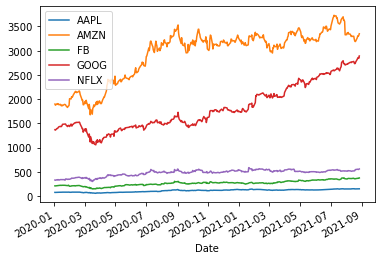

In [54]:
FAANG_data.plot() #plot of stock prices

# Operations on DataFrames:-

One of the important functionalities in Pandas in filtering dataframes. Often we want to work with a subset of data, based on some criteria. Let us take a look at few examples:-

In [55]:
print(FAANG_data.shape) 
FAANG_data_filtered = FAANG_data[(FAANG_data['AMZN'] < 3000) & (FAANG_data['GOOG'] < 2500)]
print(FAANG_data_filtered.shape)

(418, 5)
(135, 5)


Normally in python, we use **and**, **or** while writing programs. In Pandas, we will have to use bitwise operations which are as follows:-

& - and <br>
or - | <br>
not - ~ <br>

In [56]:
FAANG_data_filtered.tail()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-09-18,106.839996,2954.909912,252.529999,1459.989990,469.959991
2020-09-21,110.080002,2960.469971,248.149994,1431.160034,487.350006
2020-09-23,107.120003,2999.860107,249.020004,1415.209961,470.609985
2021-03-04,120.129997,2977.570068,257.640015,2049.090088,511.290009
2021-03-08,116.360001,2951.949951,255.309998,2024.170044,493.329987


In [70]:
comp_df[comp_df['Industry Type'].str.contains('Hedge')] #filtering with strings

,Industry Type,Number of Employees
Citadel,Hedge Fund,1400.0
Two Sigma,Hedge Fund,1600.0


We can apply numpy mathematical functions to dataframes as well, which we will take a look:-

In [57]:
FAANG_data_log = np.log(FAANG_data) #applying log transformation to each of the values
FAANG_data_log.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-01-02,4.318654,7.548561,5.346059,7.220644,5.798517
2020-01-03,4.308885,7.536348,5.340754,7.215725,5.786591
2020-01-06,4.316821,7.551124,5.359412,7.240083,5.816605
2020-01-07,4.312107,7.553213,5.361574,7.239459,5.801363
2020-01-08,4.328065,7.545374,5.371661,7.247308,5.826767


In [58]:
FAANG_data_exp_NFLX = FAANG_data.copy()
FAANG_data_exp_NFLX['NFLX'] = np.log(FAANG_data_exp_NFLX['NFLX']) #applying transformation on a single column
FAANG_data_exp_NFLX.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,5.798517
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,5.786591
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,5.816605
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,5.801363
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,5.826767


Often times, while doing data analysis...we would like to take a look at statistics of the numerical data such as its mean, median and if there are any null values in data. This is done by using describe function:-

In [61]:
FAANG_data.describe()

,AAPL,AMZN,FB,GOOG,NFLX
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,110.331053,2925.789013,264.651196,1811.157306,476.758756
std,25.780368,532.528519,53.179714,471.833537,64.627349
min,56.092499,1676.609985,146.009995,1056.619995,298.839996
25%,81.285624,2475.099976,229.347500,1451.264984,436.320000
50%,118.855000,3148.089966,266.619995,1647.309998,496.034988
75%,130.079994,3286.632446,298.125000,2126.707520,522.282486
max,151.119995,3731.409912,373.279999,2891.010010,586.340027


In [62]:
#renaming columns
FAANG_data.columns = ['Apple','Amazon','Facebook','Google','Netflix']
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010


In [64]:
FAANG_data>2000 #how filtering works essentially

,Apple,Amazon,Facebook,Google,Netflix
Date,,,,,
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False
2020-01-08,False,False,False,False,False
...,...,...,...,...,...
2021-08-23,False,True,False,True,False
2021-08-24,False,True,False,True,False
2021-08-25,False,True,False,True,False


We can often use multiple filter operations followed by selections in a single command to performm our task, it becomes very convenient. Lets see an example:-

In [69]:
FAANG_data[FAANG_data.index<pd.to_datetime('2021-01-01')][['Apple','Google']].tail()

,Apple,Google
Date,,
2020-12-24,131.970001,1738.849976
2020-12-28,136.690002,1776.089966
2020-12-29,134.869995,1758.719971
2020-12-30,133.720001,1739.520020
2020-12-31,132.690002,1751.880005


We can use apply function to perform operations on rows. Its a pythonic way of doing it, instead of writing loops. Lets see a couple of examples:-

In [89]:
def high_price(x,y):
    if (x+y)//2>1600:
        return 'Yes'
    else:
        return 'No'

In [78]:
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010


In [90]:
FAANG_data['High Stock Price'] = FAANG_data.apply(lambda x: high_price(x['Google'],x['Amazon']), axis = 1)
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price
Date,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes


In [92]:
FAANG_data[FAANG_data['High Stock Price'] == 'No'].head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price
Date,,,,,,
2020-03-06,72.257500,1901.089966,181.089996,1298.410034,368.970001,No
2020-03-09,66.542503,1800.609985,169.500000,1215.560059,346.489990,No
2020-03-10,71.334999,1891.819946,178.190002,1280.390015,364.130005,No
2020-03-11,68.857498,1820.859985,170.240005,1215.410034,349.920013,No
2020-03-12,62.057499,1676.609985,154.470001,1114.910034,315.250000,No


Now we will see, how to handle missing data in Pandas as well as group by operations:-

In [101]:
#just an example
FAANG_data['Linkedin'] = np.random.choice([240,239,241,np.nan], size = len(FAANG_data))
FAANG_data['Microsoft'] = np.random.choice([300,296,298,np.nan], size = len(FAANG_data))
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price,Linkedin,Microsoft
Date,,,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes,239.0,296.0
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes,NaN,296.0
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes,239.0,300.0
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes,239.0,296.0
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes,239.0,NaN


In [102]:
#dropping null values
FAANG_data.dropna().head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price,Linkedin,Microsoft
Date,,,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes,239.0,296.0
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes,239.0,300.0
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes,239.0,296.0
2020-01-10,77.582497,1883.160034,218.059998,1429.729980,329.049988,Yes,239.0,296.0
2020-01-13,79.239998,1891.300049,221.910004,1439.229980,338.920013,Yes,240.0,300.0


In [98]:
#imputing null values with mean and median
FAANG_data['Linkedin'] = FAANG_data['Linkedin'].fillna(value = FAANG_data['Linkedin'].mean())
FAANG_data['Microsoft'] = FAANG_data['Microsoft'].fillna(value = FAANG_data['Microsoft'].median())
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price,Linkedin,Microsoft
Date,,,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes,240.000000,296.0
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes,240.015723,298.0
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes,239.000000,300.0
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes,240.000000,298.0
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes,239.000000,296.0


Let us take a look at **group by** operation. Groupby allows us to group together rows based off a column and perform an aggregate function on them( count, max, mean etc)

In [103]:
comp_df.groupby('Industry Type').mean() #average number of employees in each industry type

,Number of Employees
Industry Type,
Hedge Fund,1500.0
Investment Bank,69500.0
Propreitary Trading,1200.0


In [106]:
comp_df.groupby('Industry Type').sum() #sum of employees in each industry type

,Number of Employees
Industry Type,
Hedge Fund,3000.0
Investment Bank,208500.0
Propreitary Trading,1200.0


In [108]:
comp_df['Industry Type'].value_counts() #This operation is really helpful to know if there are any duplicate entries or count of each entry

Investment Bank        3
Hedge Fund             2
Propreitary Trading    1
Name: Industry Type, dtype: int64

In [112]:
comp_df_modified = comp_df.reset_index().rename({'index':"Company"}, axis = 1,) #index resetting and renaming a column

In [115]:
comp_df_modified.sort_values(['Number of Employees'], ascending = False) #sorting a column

,Company,Industry Type,Number of Employees
5,JP Morgan,Investment Bank,100000.0
4,Morgan Stanley,Investment Bank,68000.0
3,Goldman Sachs,Investment Bank,40500.0
2,Two Sigma,Hedge Fund,1600.0
1,Citadel,Hedge Fund,1400.0
0,Jane Street,Propreitary Trading,1200.0


**Pandas is the bread and butter of data analysis when it comes to tabular data. Play with it functionalities on your own to get a hang of it. We will be using operations like filter, null value imputation a lot in data cleaning**
